<h1>Black Friday Sales EDA </h1>



About this Dataset
Dataset History

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
# Ensure system is above 3.5 
import sys
assert sys.version_info >= (3, 5)

In [4]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [5]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [6]:
# Import for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
# Download the Friday sale EDA dataset from Kaggle

BlackFridaySale = pd.read_csv("/Users/gedoz/Downloads/BlackFridaySale.csv")


In [9]:
# Display the basic informations of the dataset
BlackFridaySale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


*There are 11 attributes, 7 of which are numerical whilst 5 of which are not. product_Category_2 and product_Category_3 both do not total to 550068 which might be an indicator of missing values or NAN values.*


In [49]:
df.isnull().sum()   # display the total number of null value in each columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

*Confirms that there are multiple null values in the product_category_2 and product_category_3*

In [12]:
sample_incomplete_rows = BlackFridaySale[BlackFridaySale.isnull().any(axis=1)].head()
sample_incomplete_rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227


*Confirms that there are multiple null values in the product_category_2 and product_category_3, these will have to be cleansed before further data processing can happen* 

<h1>Clean up the dataset for processing </h2>

In [50]:
df=df.fillna(0) #fill all null value with 0
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,0.0,0.0,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,0.0,0.0,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,0.0,0.0,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,0.0,0.0,365


In [51]:
df['Gender']=df['Gender'].map({'M':1,'F':0})  # covert the gender to categorical for processing

# Data Structure

In [13]:
BlackFridaySale["Product_Category_1"].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [14]:
BlackFridaySale["Product_Category_2"].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [15]:
BlackFridaySale["Product_Category_3"].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

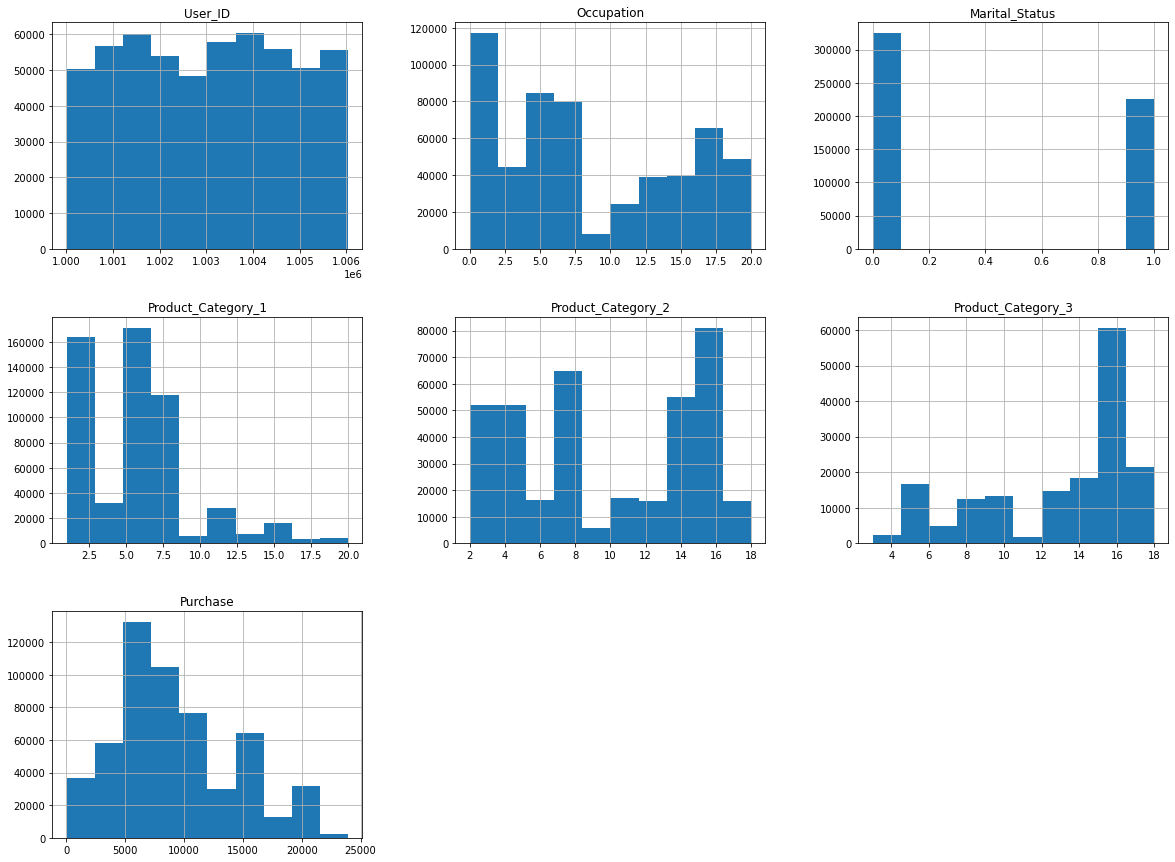

In [16]:
BlackFridaySale.hist(bins=10, figsize=(20,15))
plt.show()

*Based on these histograms, it seems as though, there is a surplus of a specific item in Product_Category_3 whilst the rest of the items are not as plentiful. Product_Category_1 and Product_Category_2 do not seem to show this general pattern.*

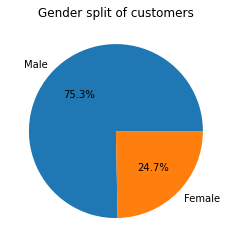

In [17]:
labels=['Male','Female']
plt.pie(BlackFridaySale.Gender.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Gender split of customers')
plt.show()

*Male show a higher percentage than female*

In [18]:
BlackFridaySale['Age'].value_counts().index   #show all age range of customer

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

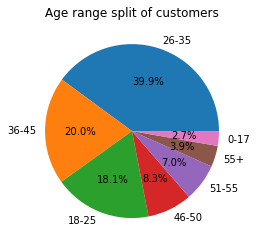

In [19]:
labels=df['Age'].value_counts().index
plt.pie(BlackFridaySale.Age.value_counts(),autopct='%1.1f%%',labels=labels)   
plt.title('Age range split of customers')
plt.show()

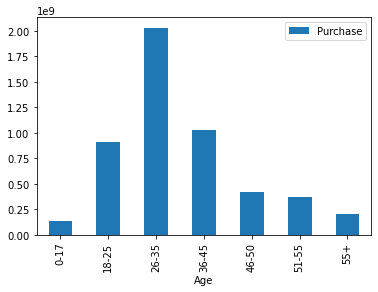

In [20]:
#create a graph with age and total purchase of each age group

BlackFridaySale.groupby('Age')['Purchase'].sum().plot(kind='bar')
plt.legend()

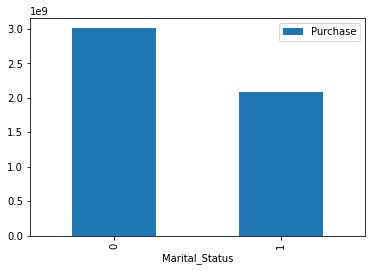

In [23]:
BlackFridaySale.groupby('Marital_Status')['Purchase'].sum().plot(kind='bar')
plt.legend()

*Unmarried people made more purchases than those that were married*

In [24]:
#Convert Age into categorical data
BlackFridaySale['Age']=BlackFridaySale['Age'].map({'26-35':2, '36-45':3, '18-25':1, '46-50':4, '51-55':5, '55+':6, '0-17':0})   #way to automatic this?


In [25]:
BlackFridaySale.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,6,16,C,4+,0,8,NaN,NaN,7969


In [27]:

BlackFridaySale["User_ID"].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

*User 1001680 displays the most amount of purchases*

In [28]:
#show the total number of unique product bought by coustomer
BlackFridaySale["Product_ID"].nunique()

3631

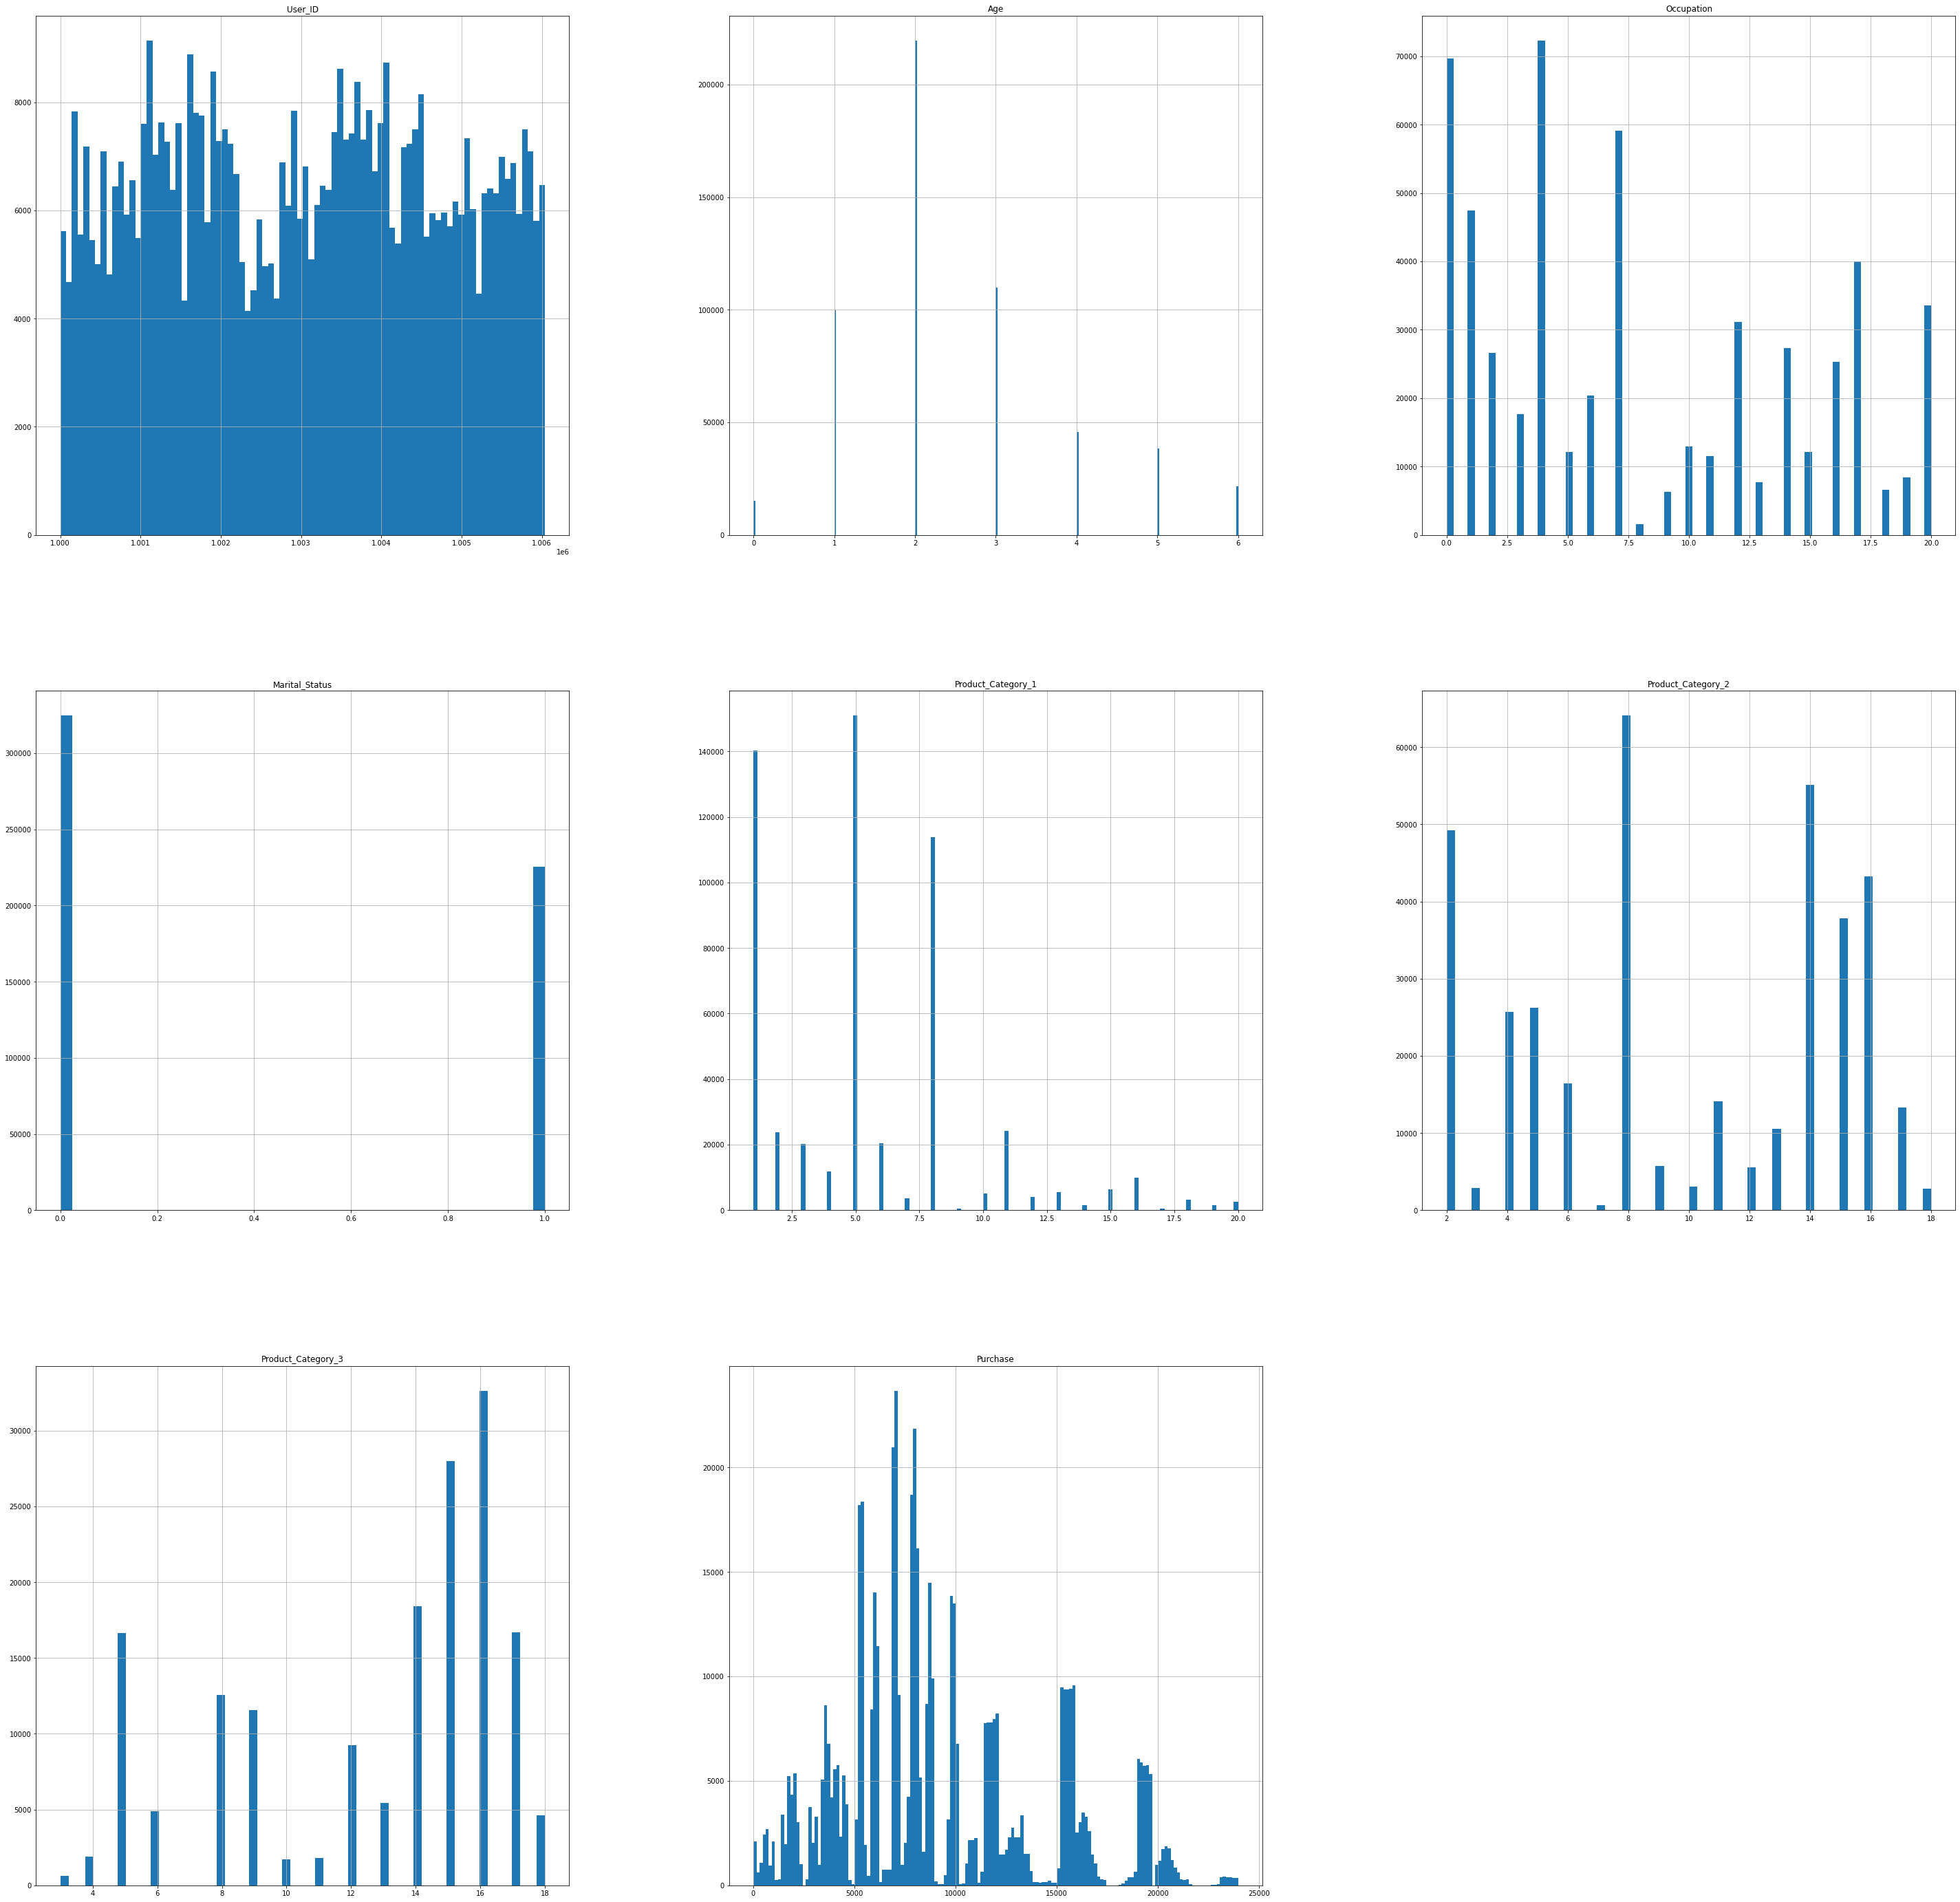

In [29]:
%matplotlib inline
BlackFridaySale.hist(bins='auto', figsize=(50,50))
plt.show()

In [30]:
#how what is the highest relations to purchase 
corr_matrix=BlackFridaySale.corr()
corr_matrix['Purchase'].sort_values(ascending=False)  

Purchase              1.000000
Occupation            0.020833
Age                   0.015839
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_3   -0.022006
Product_Category_2   -0.209918
Product_Category_1   -0.343703
Name: Purchase, dtype: float64

*According to the correlation, product_category_3 has a mild positive correlation with purchase, there also seems to be a mild negative correlation with product_category_1*

array([[<AxesSubplot:xlabel='Purchase', ylabel='Purchase'>,
        <AxesSubplot:xlabel='Age', ylabel='Purchase'>],
       [<AxesSubplot:xlabel='Purchase', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>]], dtype=object)

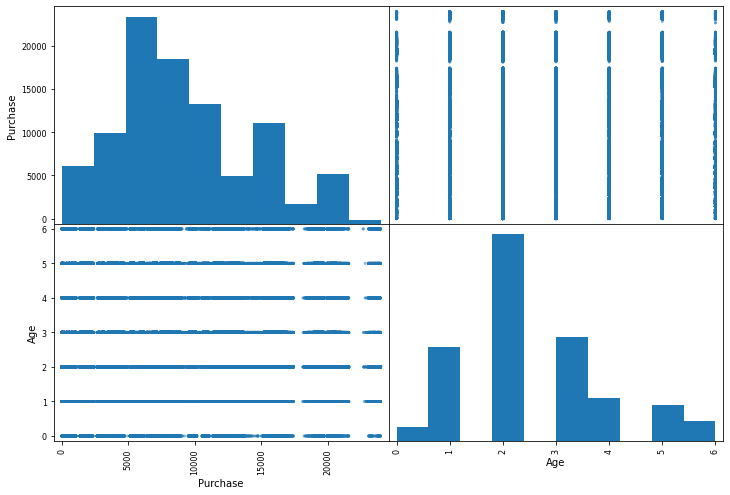

In [31]:

from pandas.plotting import scatter_matrix

Attributes=['Purchase','Age','Gender']
scatter_matrix(BlackFridaySale[Attributes],figsize=(12,8))

In [32]:
corr_matrix["Occupation"].sort_values(ascending=False)

Occupation            1.000000
Age                   0.091463
Marital_Status        0.024280
Purchase              0.020833
Product_Category_3    0.013263
Product_Category_2   -0.000384
Product_Category_1   -0.007618
User_ID              -0.023971
Name: Occupation, dtype: float64